# Исследование рынка компьютерных игр

## Задача

Выявить закономерности, определяющие успешность компьютерных игр, по историческим данным (до 2016 года) о продажах игр, оценках пользователей и экспертов, жанрах и платформах. Планируется кампания на 2017 год.

## Описание данных

Таблица **games** (данные о продажах игр, оценки пользователей и экспертов, жанры и платформы):

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## Оглавление

### [Шаг 1. Открытие файла с данными и изучение общей информации](#read_data)
### [Шаг 2. Подготовка данных](#data_preparation)
### [Шаг 3. Исследовательский анализ данных](#exploratory_data_analysis)
### [Шаг 4. Составление портрета пользователя каждого региона](#user_portrait)
### [Шаг 5. Проверка гипотез](#hypothesis_testing)
### [Шаг 6. Общий вывод](#general_conclusion)

## Ход работы

#### Импортируем необходимые для работы библиотеки.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
import warnings
warnings.simplefilter('ignore')

## <a id='read_data'>Шаг 1. Открытие файла с данными и изучение общей информации</a>

#### Откроем файл с данными и сохраним их в переменной *games_data*.

In [2]:
games_data = pd.read_csv('/datasets/games.csv')

#### Изучим общую информацию.

In [3]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Посчитаем количество пропусков в каждом столбце.

In [4]:
games_data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [5]:
games_data.query('Name.isna()')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [6]:
pd.DataFrame(round((games_data.isna().mean() * 100), 2)).style.background_gradient('coolwarm')

,0
Name,0.01
Platform,0
Year_of_Release,1.61
Genre,0.01
NA_sales,0
EU_sales,0
JP_sales,0
Other_sales,0
Critic_Score,51.32
User_Score,40.09


#### Посчитаем предварительное число дубликатов в таблице.

In [7]:
games_data.duplicated().sum()

0

#### Взглянем на первые 10 строк таблицы.

In [8]:
games_data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


#### Найдём максимальное и минимальное значения у столбцов с количественными данными и просмотрим значения в столбцах с категориальными данными.

In [9]:
games_data.min()

Year_of_Release    1980.0
NA_sales              0.0
EU_sales              0.0
JP_sales              0.0
Other_sales           0.0
Critic_Score         13.0
dtype: float64

In [10]:
games_data.max()

Year_of_Release    2016.00
NA_sales             41.36
EU_sales             28.96
JP_sales             10.22
Other_sales          10.57
Critic_Score         98.00
dtype: float64

In [11]:
games_data['Critic_Score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [12]:
games_data['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [13]:
games_data['Name'].value_counts()

Need for Speed: Most Wanted                            12
Madden NFL 07                                           9
FIFA 14                                                 9
LEGO Marvel Super Heroes                                9
Ratatouille                                             9
                                                       ..
Rocky Balboa                                            1
A New Beginning                                         1
Midnight Club 3: DUB Edition (America weekly sales)     1
Blood: The Last Vampire (Joukan)                        1
PDC World Championship Darts 2009                       1
Name: Name, Length: 11559, dtype: int64

In [14]:
games_data.query('Name == "Need for Speed: Most Wanted"')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


In [15]:
games_data['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [16]:
games_data['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [17]:
games_data['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

### Вывод

Датафрейм состоит из 16 715 строк и 11 столбцов. В двух строках имеются пропуски в названии игры и её жанра. Год выпуска пропущен в 1.61% данных. Также пропущено свыше 40% оценок пользователей и данных о рейтинге от организации ESRB. Оценка критиков отсутствует в свыше 50% данных. Возможно, открытые источники, из которых получены данные, не сильно интересуются отзывами об играх.

Дубликатов в датафрейме не обнаружено.

Также в глаза бросаются следующие артефакты:

- Названия столбцов приведены в неудобном для работы регистре;
- В некоторых столбцах обнаружено несоответствие типов данных (год выпуска и оценка критиков представлены числами с плавающей точкой, оценка пользователей — в формате *object*).
- Согласно данным <a href=https://www.esrb.org/ratings-guide/><b>ESRB Ratings Guide</b></a> и статье в Википедии <a href=https://en.wikipedia.org/wiki/Entertainment_Software_Rating_Board><b>Entertainment Software Rating Board</b></a>, рейтинг *K-A* был переименован в *E* в 1998 году. Рейтинг *EC* перестал использоваться с 2018 года, поэтому его появление в данных за 2016 год не вызывает вопросов.

## <a id='data_preparation'>Шаг 2. Подготовка данных</a>

#### Приведём названия столбцов к нижнему регистру.

In [18]:
games_data.columns = games_data.columns.str.lower()

#### Так как год выпуска и оценка по стобалльной шкале подразумевают целые числа, приведём данные в этих столбцах к целочисленному типу.

In [19]:
games_data.loc[:, ['year_of_release', 'critic_score']] =\
games_data.loc[:, ['year_of_release', 'critic_score']].astype('Int64')

В столбце с оценкой пользователей обнаружено значение *tbd*, означающее *to be determined*, то есть значение будет определено в будущем. Следовательно, в строках с соответствующим значением оценки пользователей пока неизвестны.

#### Приведём данные об оценке пользователей в тип *float64*, заменив значения *tbd* на пропуски.

In [20]:
games_data['user_score'] = pd.to_numeric(games_data['user_score'], errors = 'coerce')

In [21]:
games_data.dtypes

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score         Int64
user_score         float64
rating              object
dtype: object

#### Заменим рейтинг *K-A* в данных датафрейма на рейтинг *E*.

In [22]:
games_data['rating'] = games_data['rating'].replace('K-A', 'E')

Существенное количество пропусков обнаружено лишь в данных об оценках пользователей, оценках критиков и рейтинге.

Идея заменить пропуски средним значением по всем платформам, если игра представлена на нескольких платформах и информация о пропущенных данных известна на соседних, была отвергнута, так как в итоге удалось заполнить менее 5% пропусков за непростительно долгое время работы функции.

#### Избавимся от малочисленных пропусков в именах игр, их жанров и годов выпуска.

In [23]:
games_data = games_data.dropna(subset=['name', 'year_of_release', 'genre'])

In [24]:
pd.DataFrame(round((games_data.isna().mean() * 100), 2)).style.background_gradient('coolwarm')

,0
name,0
platform,0
year_of_release,0
genre,0
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0
critic_score,51.45
user_score,54.62


#### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец *total_sales*.

In [25]:
games_data['total_sales'] = games_data['na_sales'] + games_data['eu_sales']\
+ games_data['jp_sales'] + games_data['other_sales']

In [26]:
games_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Вывод

Названия столбцов были приведены к нижнему регистру. Год выпуска игры и оценка критиков, измеряемая по стобалльной шкале, были приведены к целочисленному типу.

В столбце с оценкой пользователей обнаружено значение *tbd*, означающее *to be determined*, то есть значение будет определено в будущем. Следовательно, в строках с соответствующим значением оценки пользователей пока неизвестны. Поэтому эти данные были приведены к типу *float64*, а значения *tbd* заменены на пропуски.

Рейтинг *K-A* в данных датафрейма был заменён на рейтинг *E*.

Существенное количество пропусков обнаружено лишь в данных об оценках пользователей, оценках критиков и рейтинге.

Идея заменить пропуски средним значением по всем платформам, если игра представлена на нескольких платформах и информация о пропущенных данных известна на соседних, была отвергнута, так как в итоге удалось заполнить менее 5% пропусков за непростительно долгое время работы функции.

Малочисленные пропуски в именах игр, их жанров и годов выпуска были удалены.

Суммарные продажи во всех регионах были посчитаны и записаны в отдельный столбец.

## <a id='exploratory_data_analysis'>Шаг 3. Исследовательский анализ данных</a>

In [27]:
def add_value_labels(ax, spacing=1):
    '''
    Добавляет метки над каждым столбцом столбчатой диаграммы.
    
    Аргументы:
        ax (matplotlib.axes.Axes): объект matplotlib, содержащий оси 
        графика для аннотации.
        
        spacing (int): расстояние между метками и столбцами.
    '''
    
    # Для каждого столбца: разместить метку
    for rect in ax.patches:
        # Получить X и Y координаты метки из прямоугольника
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Количество точек между столбцом и меткой
        space = spacing
        # Вертикальное выравнивание для положительных значений
        va = 'bottom'

        # Если значение столбца отрицательное: разместить метку под столбцом
        if y_value < 0:
            # Инвертирование space, чтобы разместить метку под
            space *= -1
            # Вертикальное выравнивание
            va = 'top'

        # Использование значения Y как метки
        label = y_value

        # Создание аннотации
        ax.annotate(
            label,                          # используем label как метку
            (x_value, y_value),             # помещаем метку на конец столбца
            xytext=(0, space),              # сдвигаем метку по вертикали на space
            textcoords='offset points',     # интерпретируем xytext как смещение в точках
            ha='center',                    # центрируем метку горизотально
            va=va)                          # устанавливаем вертикальное выравнивание
                                            # в зависимости от знака y_value

#### Посмотрим, сколько игр выпускалось в разные годы.

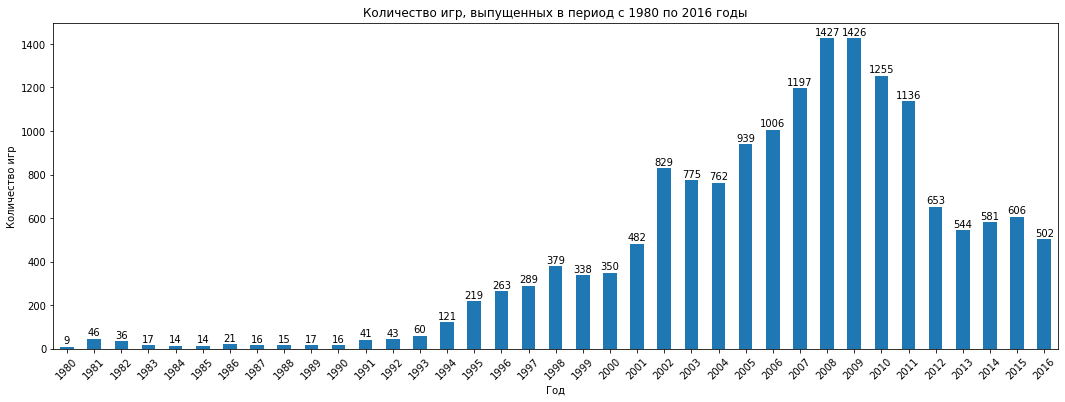

In [28]:
ax = games_data.pivot_table(index='year_of_release', values='name', aggfunc='count')\
.plot(figsize=(18, 6), kind='bar', legend=False)
add_value_labels(ax)
plt.title('Количество игр, выпущенных в период с 1980 по 2016 годы')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.xticks(rotation=45)
plt.show()

Наблюдается резкий подъём игровой индустрии, начиная с 90-х годов. Пик выпуска игр приходится на 2006-2011 годы, когда было выпущено более тысячи игр. Начиная с 2012 года наблюдается спад объёма выпуска. Планируя кампанию на 2017 год, опираться на данные многолетней давности не стоит.

#### Посмотрим, как менялись продажи по платформам.

In [29]:
top_platforms = games_data.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
.sort_values(by=['total_sales'], ascending=False).head(5).index.to_list()

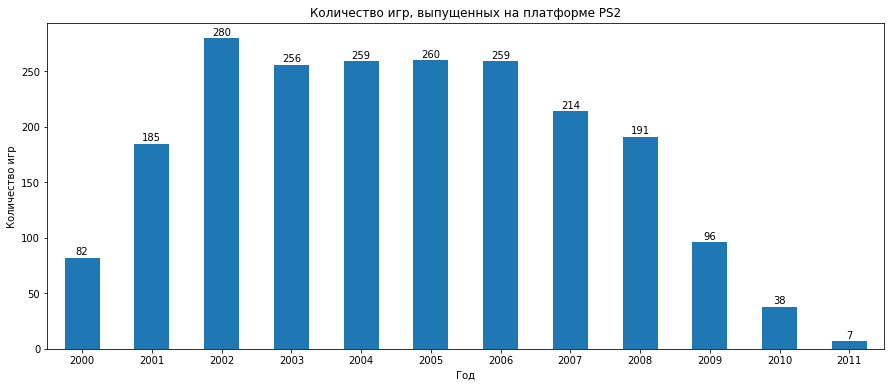

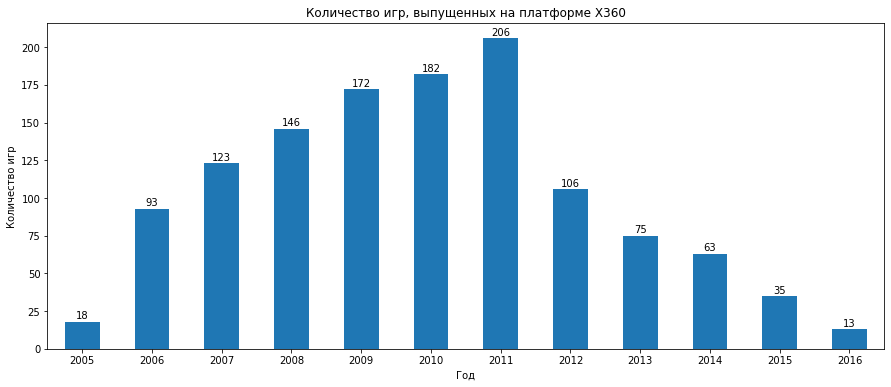

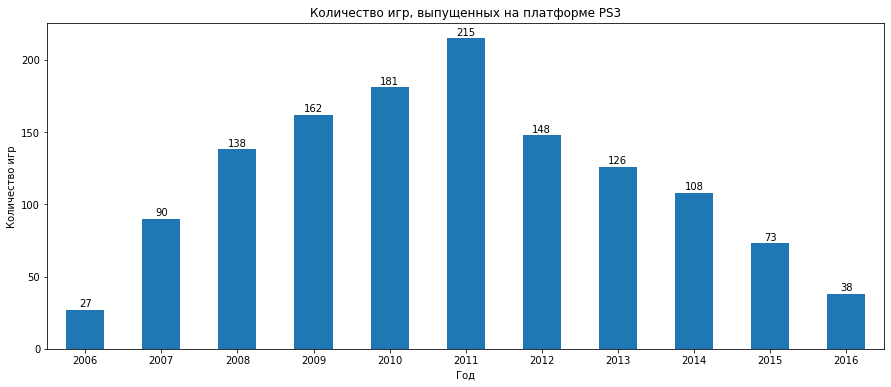

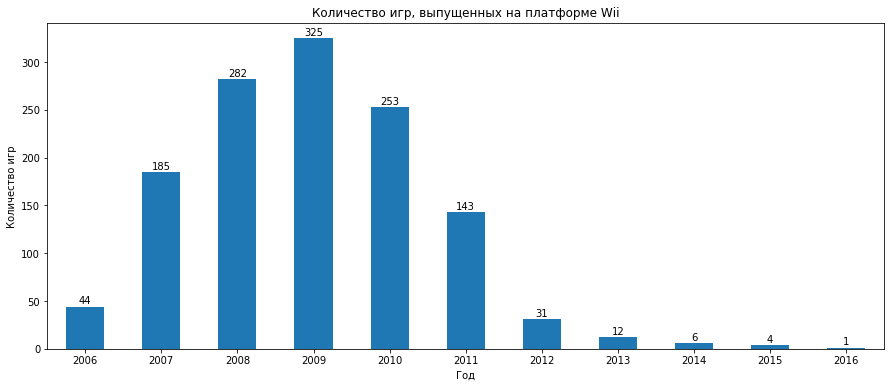

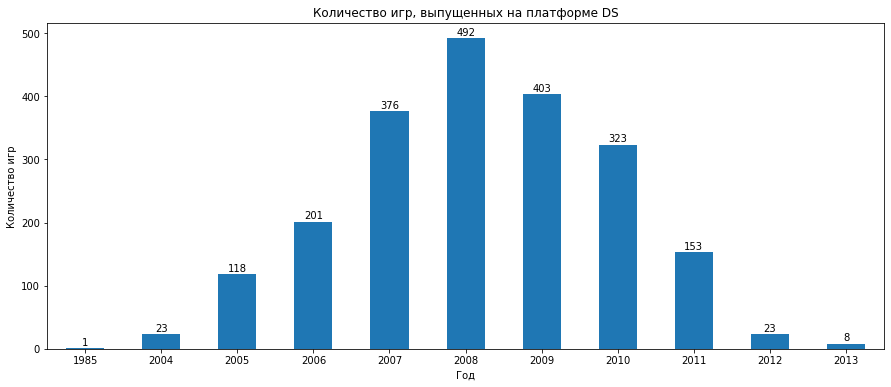

In [30]:
for platform in top_platforms:
    ax = games_data.query('platform == @platform')\
    .pivot_table(index='year_of_release', values='name', aggfunc='count')\
    .plot(kind='bar', figsize=(15, 6), legend=False)
    add_value_labels(ax)
    plt.title('Количество игр, выпущенных на платформе {}'.format(platform))
    plt.xlabel('Год')
    plt.ylabel('Количество игр')
    plt.xticks(rotation=0)
plt.show()

Даже самые прибыльные платформы за 10-12 лет изживают себя, причём около 5-6 лет они идут к пику своей популярности и ещё 5-6 лет их популярность стремится к изначальной. Следовательно, **актуальным периодом** назовём последние 4 года, а именно период с 2012 до 2015 годы, не включая сам 2016 год ввиду неполноты данных по нему.

#### Рассмотрим график продаж популярных платформ за актуальный период.

In [31]:
actual_data = games_data.query('2012 <= year_of_release < 2016')

In [32]:
top_sales = actual_data.pivot_table(index='year_of_release', columns='platform', \
                                    values='total_sales', aggfunc='sum').fillna(0)

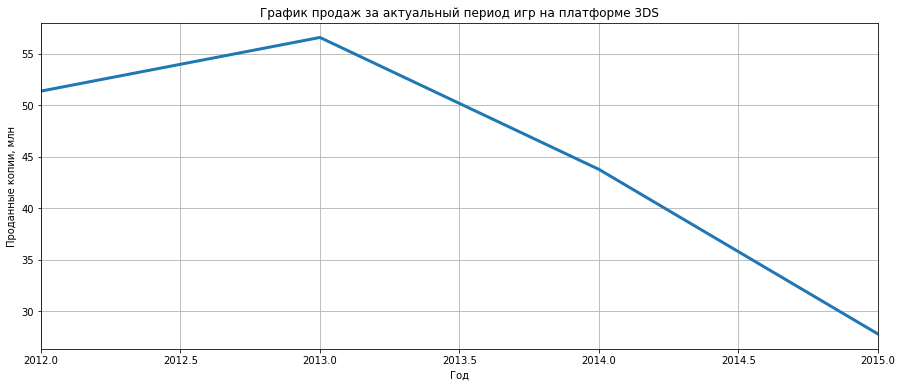

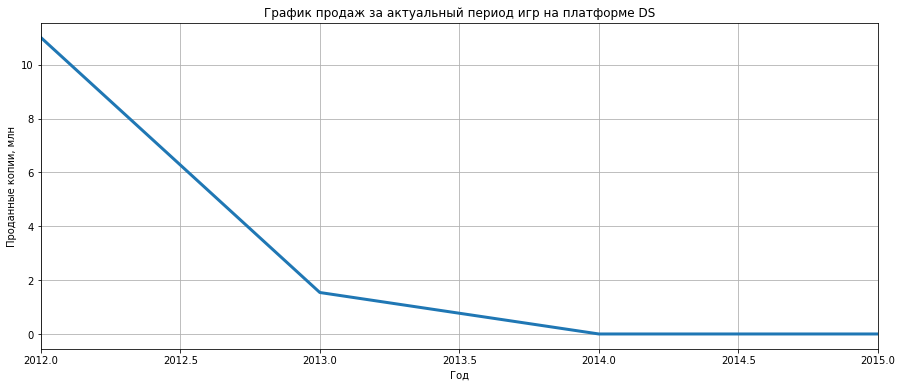

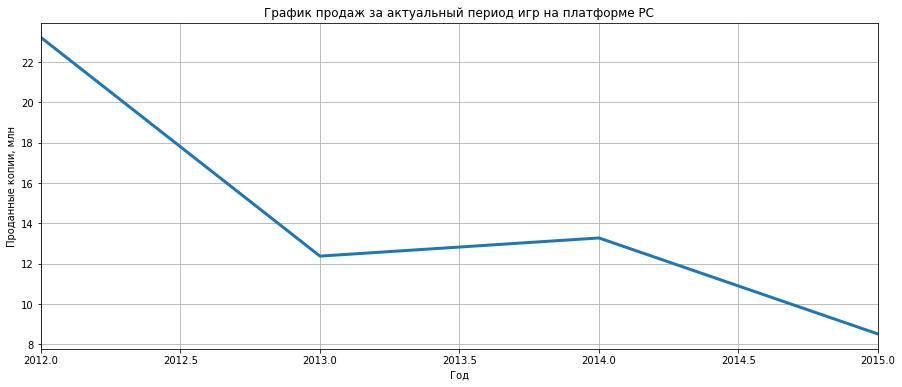

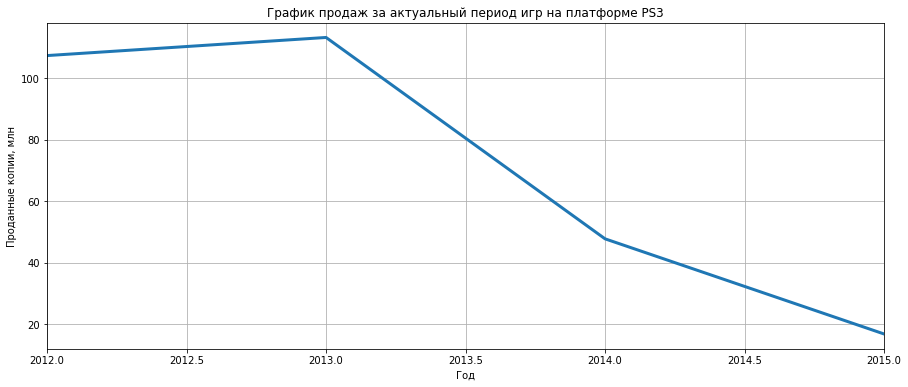

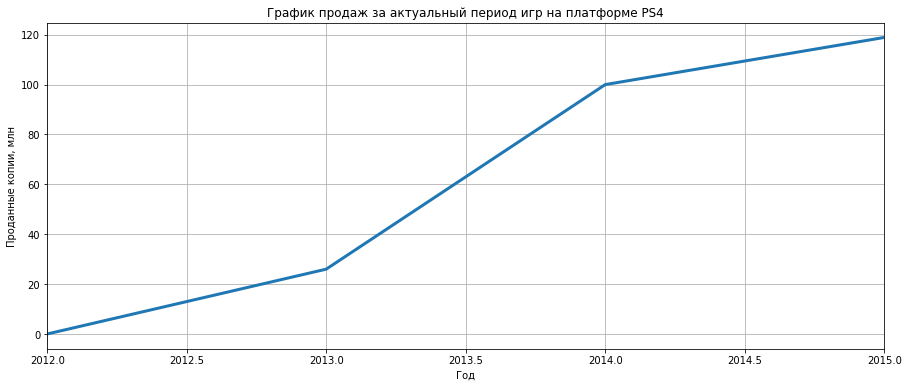

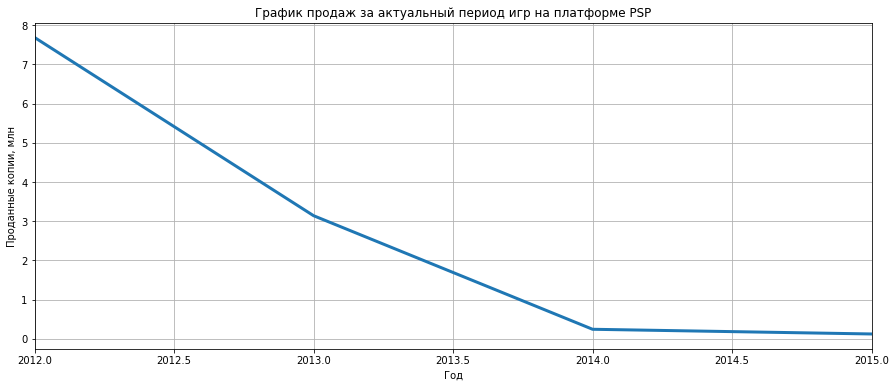

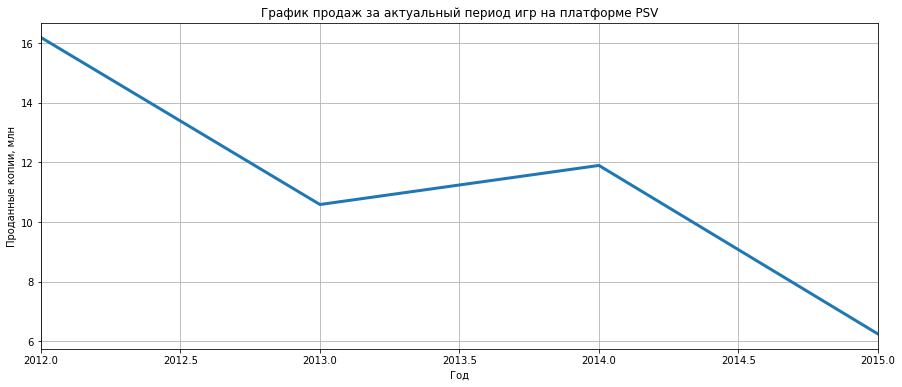

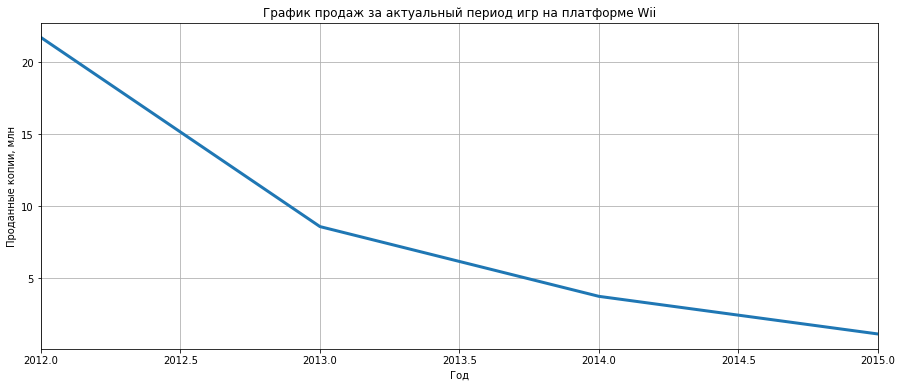

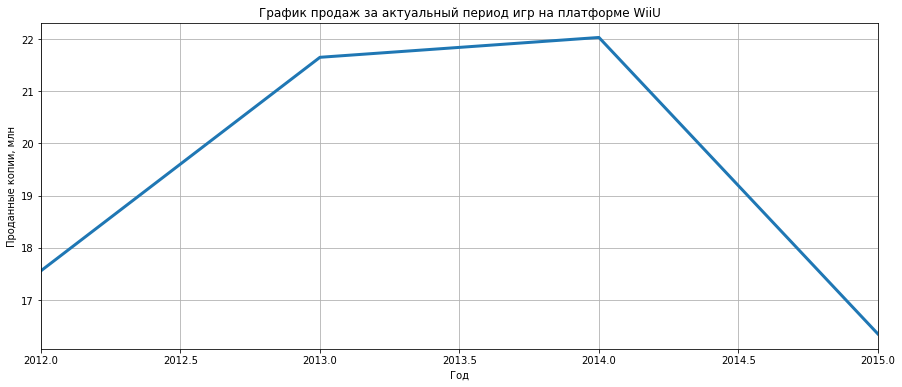

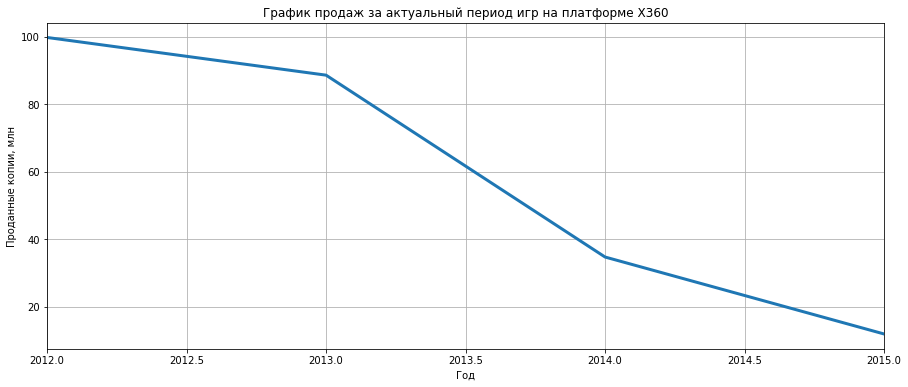

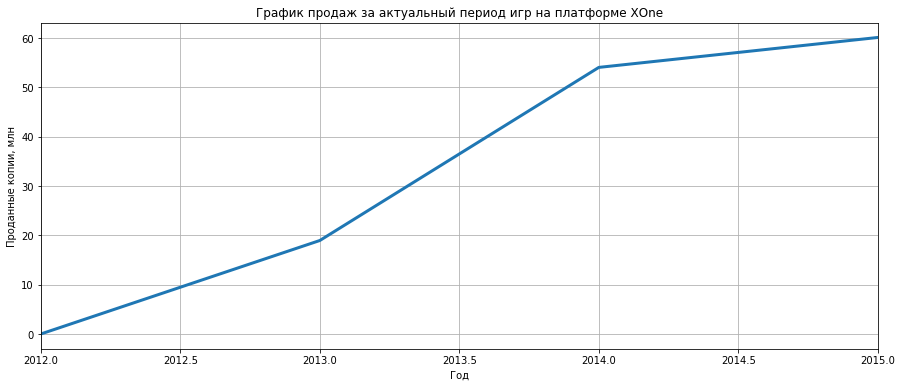

In [33]:
for platform in top_sales.columns.to_list():
    top_sales[platform].plot(figsize=(15, 6), linewidth=3)
    plt.title('График продаж за актуальный период игр на платформе {}'.format(platform))
    plt.xlabel('Год')
    plt.ylabel('Проданные копии, млн')
    plt.xticks(rotation=0)
    plt.grid()
    plt.show()

Наблюдается рост исключительно в сфере консольных игр (платформы PS4 и XOne). В свою очередь игры для этих платформ начали выпускать лишь в 2013 году, поэтому, скорее всего, ближайшие годы платформы останутся популярными.

#### Рассмотрим диаграммы размаха продаж в разбивке по платформам.

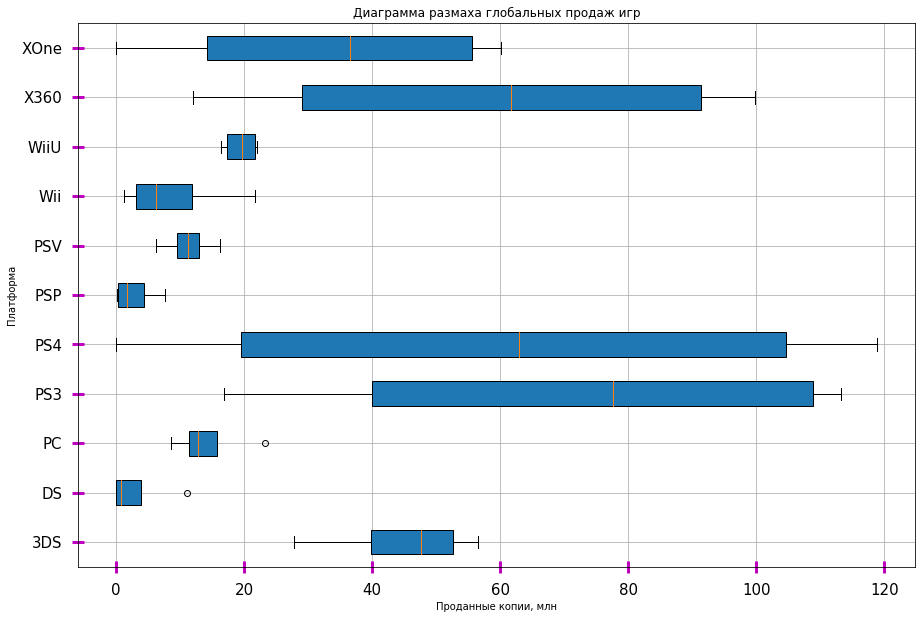

In [34]:
plt.figure(figsize=(15, 10))
plt.boxplot([top_sales['3DS'], top_sales['DS'], top_sales['PC'], top_sales['PS3'],\
             top_sales['PS4'], top_sales['PSP'], top_sales['PSV'], top_sales['Wii'],\
             top_sales['WiiU'], top_sales['X360'], top_sales['XOne']], 
            sym='o', 
            vert=False, 
            patch_artist=True, 
            labels=top_sales.columns.to_list())
plt.tick_params(which='major', 
                direction='inout', 
                length=12, 
                width=3, 
                color='m', 
                pad=10, 
                labelsize=15)
plt.title('Диаграмма размаха глобальных продаж игр')
plt.xlabel('Проданные копии, млн')
plt.ylabel('Платформа')
plt.grid()

Продажи PS3, PS4 и X360 на порядок выше остальных — медианный показатель продаж свыше 60 млн копий и достигает 100 млн копий.

#### Посмотрим, как влияют на продажи внутри популярной платформы PS4 отзывы пользователей и критиков.

In [35]:
def draw_scatter(platform):
    if actual_data.query('platform == @platform')['user_score'].dropna().shape[0] < 2\
    or actual_data.query('platform == @platform')['critic_score'].dropna().shape[0] < 2:
        print('Слишком мало данных. Платформа {} пропущена.'.format(platform))
        return
    plt.figure(figsize=(15, 6))
    plt.scatter(x=actual_data.query('platform == @platform')['user_score'], \
                y=actual_data.query('platform == @platform')['total_sales'], alpha=0.7)
    plt.title('Зависимость продаж от оценки пользователей платформы {}'.format(platform))
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Проданные копии, млн')
    plt.show()
    print('Корреляция оценки пользователей и продаж платформы {} составляет'.format(platform),\
          actual_data.query('platform == @platform')['user_score']\
          .corr(actual_data.query('platform == @platform')['total_sales']).round(2))
    
    plt.figure(figsize=(15, 6))
    plt.scatter(x=actual_data.query('platform == @platform')['critic_score'], \
                y=actual_data.query('platform == @platform')['total_sales'], alpha=0.7)
    plt.title('Зависимость продаж от оценки критиков платформы {}'.format(platform))
    plt.xlabel('Оценка критиков')
    plt.ylabel('Проданные копии, млн')
    plt.show()
    print('Корреляция оценки критиков и продаж платформы {} составляет'.format(platform), \
          actual_data.query('platform == @platform')['critic_score'].astype('float')\
          .corr(actual_data.query('platform == @platform')['total_sales']).round(2))

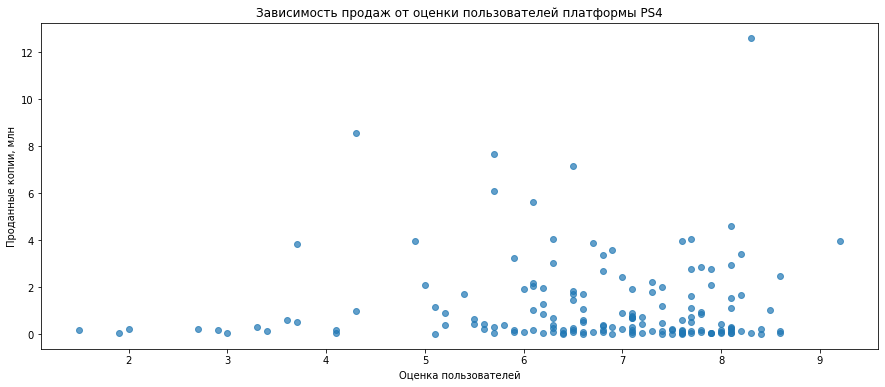

Корреляция оценки пользователей и продаж платформы PS4 составляет 0.02


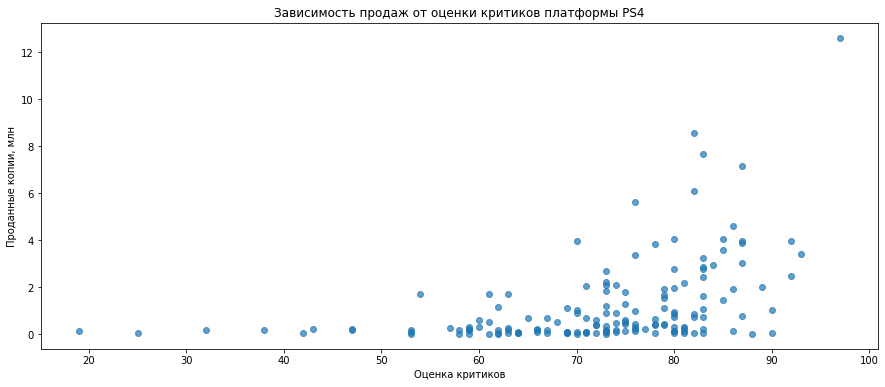

Корреляция оценки критиков и продаж платформы PS4 составляет 0.43


In [36]:
draw_scatter('PS4')

Зависимость продаж от оценки пользователей практически нет, в то время как небольшая зависимость продаж от оценки критиков всё же наблюдается. Однако не стоит сильно полагаться на эти данные, ведь более половины данных об оценках пропущено.

#### Соотнесём выводы с продажами игр на других платформах.

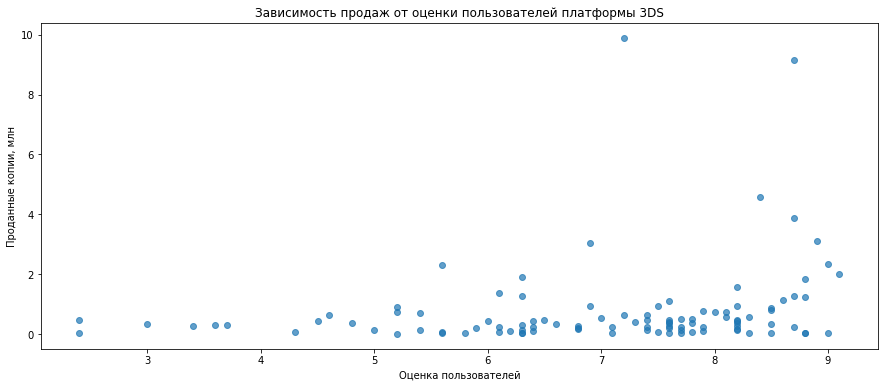

Корреляция оценки пользователей и продаж платформы 3DS составляет 0.21


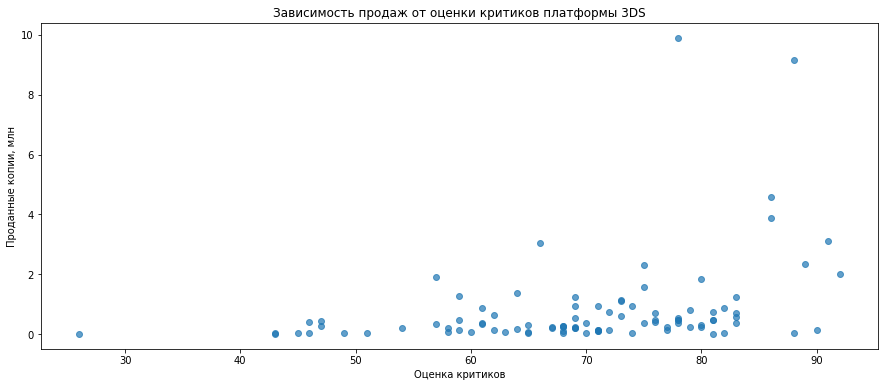

Корреляция оценки критиков и продаж платформы 3DS составляет 0.33
----------------------------------------------------------------------------------------------------
Слишком мало данных. Платформа DS пропущена.
----------------------------------------------------------------------------------------------------


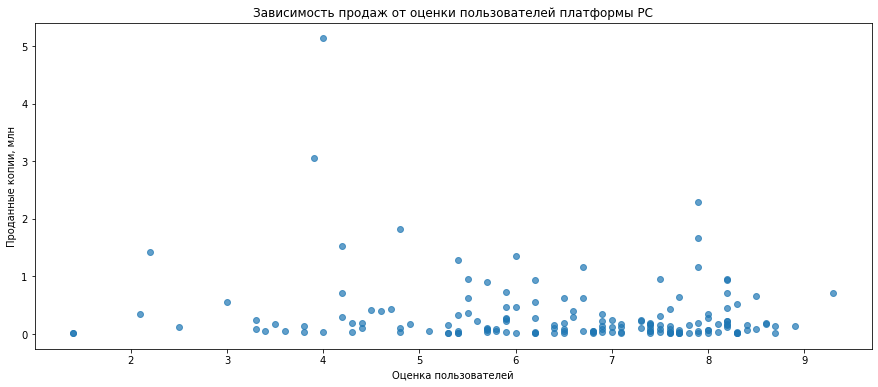

Корреляция оценки пользователей и продаж платформы PC составляет -0.16


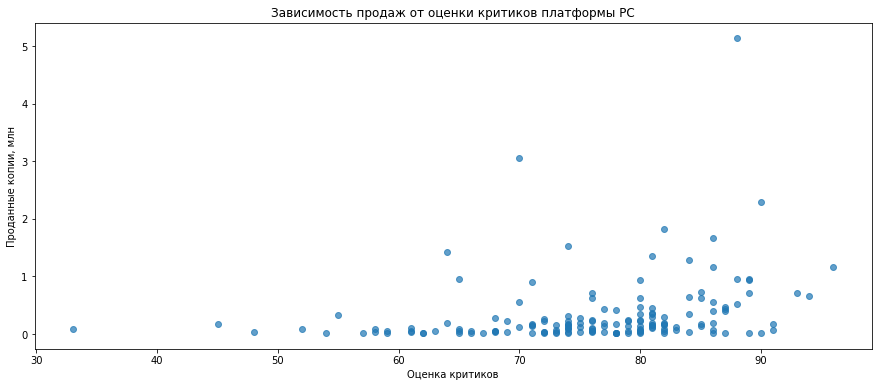

Корреляция оценки критиков и продаж платформы PC составляет 0.26
----------------------------------------------------------------------------------------------------


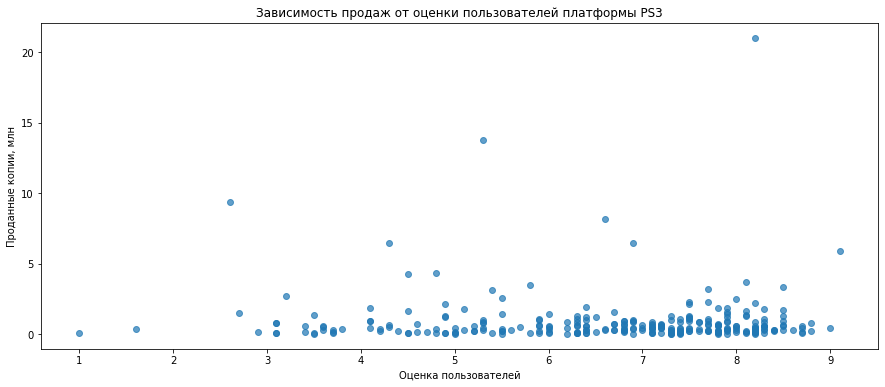

Корреляция оценки пользователей и продаж платформы PS3 составляет -0.02


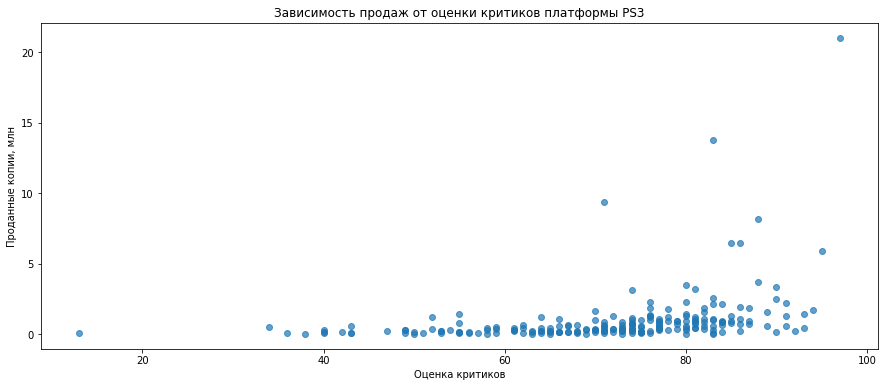

Корреляция оценки критиков и продаж платформы PS3 составляет 0.33
----------------------------------------------------------------------------------------------------
Слишком мало данных. Платформа PSP пропущена.
----------------------------------------------------------------------------------------------------


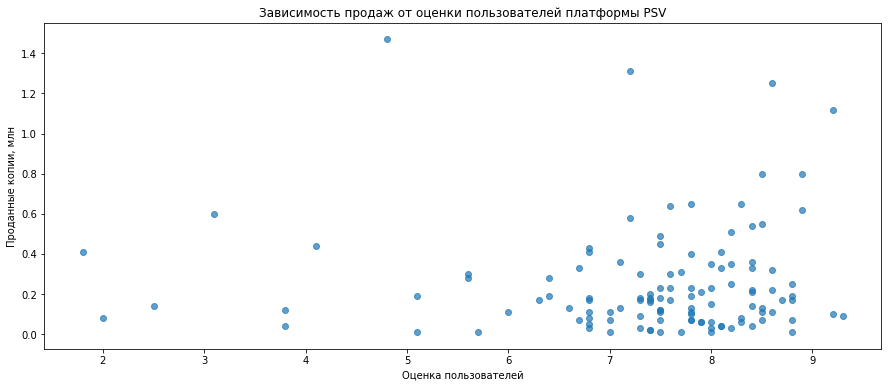

Корреляция оценки пользователей и продаж платформы PSV составляет 0.01


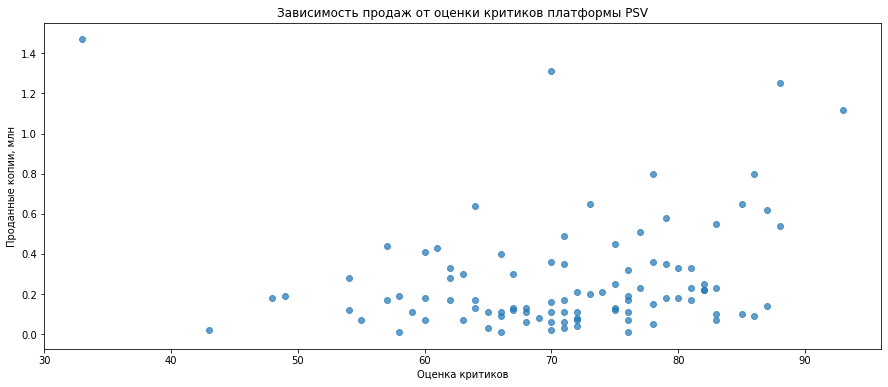

Корреляция оценки критиков и продаж платформы PSV составляет 0.12
----------------------------------------------------------------------------------------------------


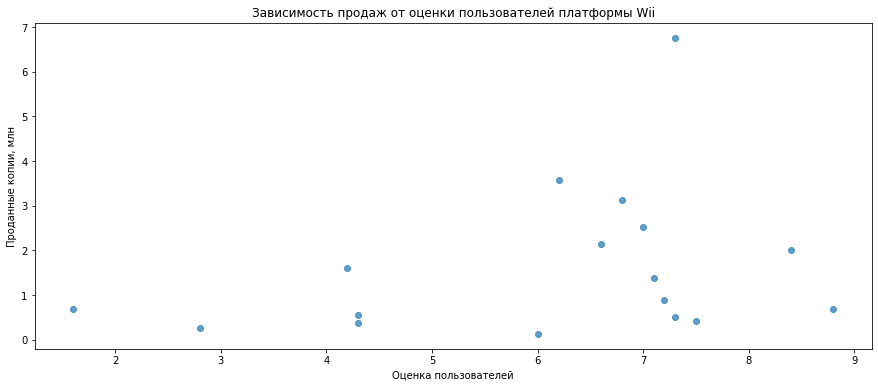

Корреляция оценки пользователей и продаж платформы Wii составляет 0.3


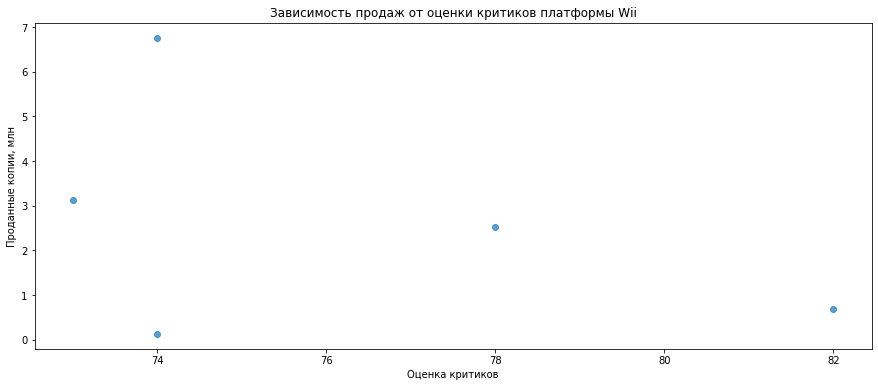

Корреляция оценки критиков и продаж платформы Wii составляет -0.42
----------------------------------------------------------------------------------------------------


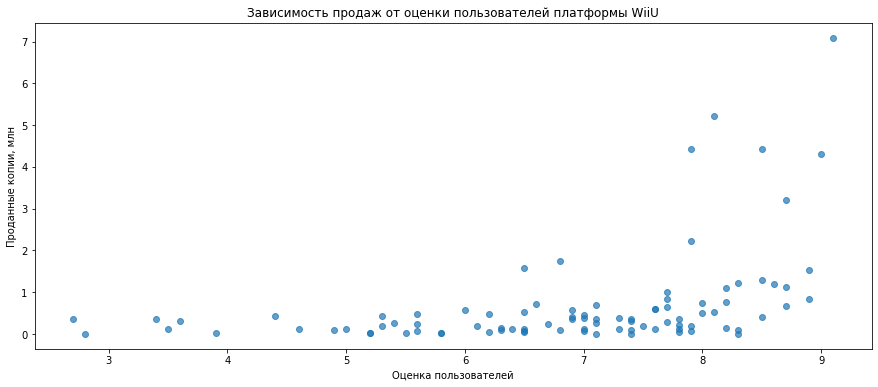

Корреляция оценки пользователей и продаж платформы WiiU составляет 0.41


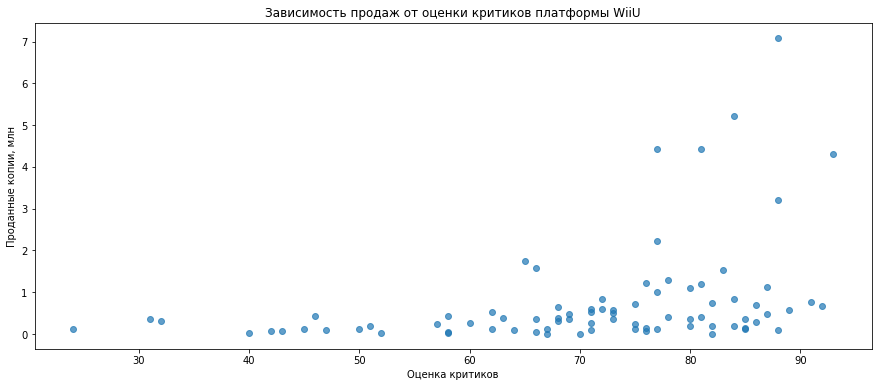

Корреляция оценки критиков и продаж платформы WiiU составляет 0.35
----------------------------------------------------------------------------------------------------


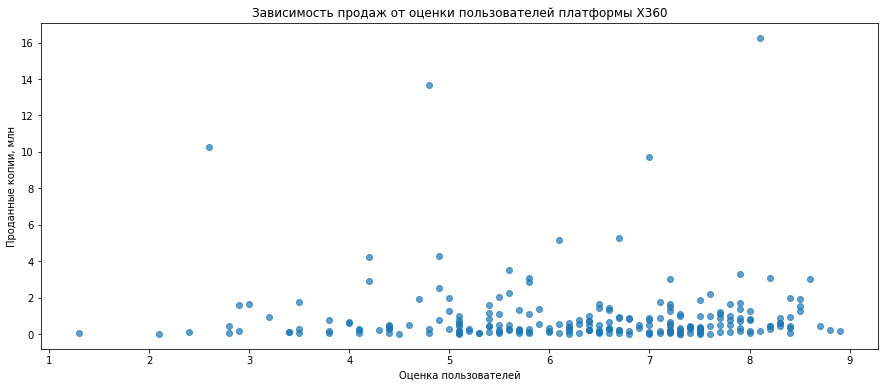

Корреляция оценки пользователей и продаж платформы X360 составляет -0.01


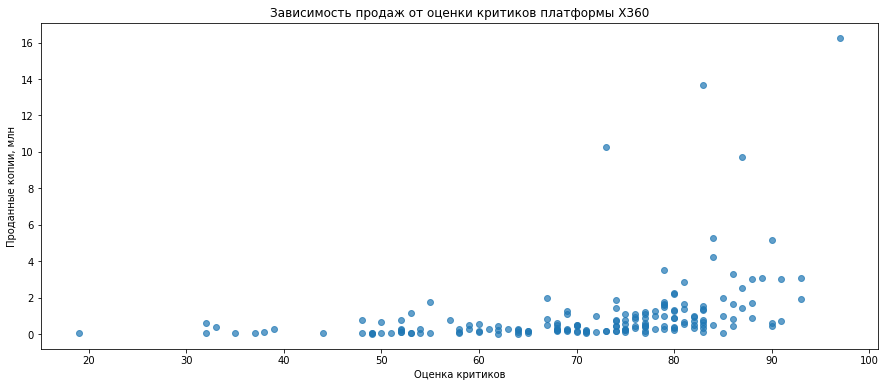

Корреляция оценки критиков и продаж платформы X360 составляет 0.36
----------------------------------------------------------------------------------------------------


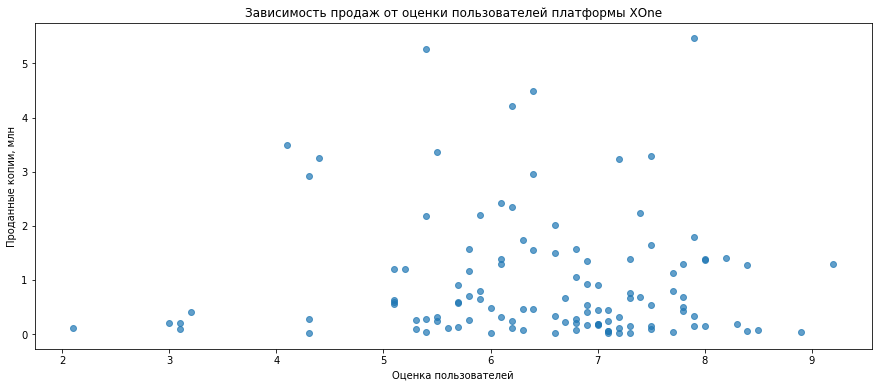

Корреляция оценки пользователей и продаж платформы XOne составляет -0.04


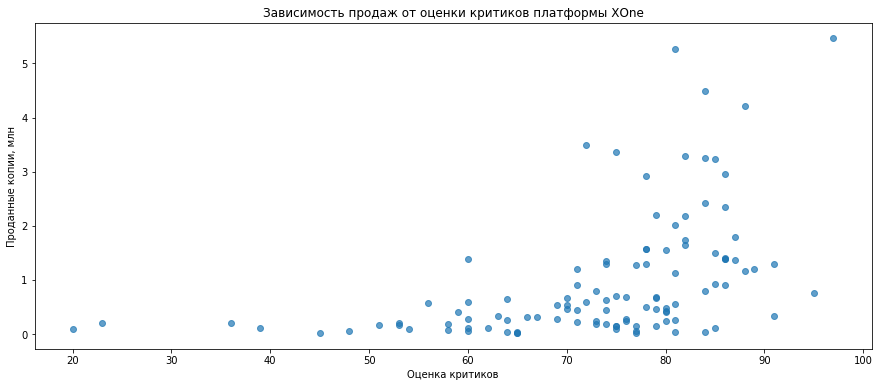

Корреляция оценки критиков и продаж платформы XOne составляет 0.46
----------------------------------------------------------------------------------------------------


In [37]:
platforms = top_sales.columns.to_list()
platforms.pop(4)

for platform in platforms:
    draw_scatter(platform)
    print('----------------------------------------------------------------------------------------------------')

На всех рассмотренных платформах отсутствует сильная зависимость между продажами и оценками. В некоторых срезах настолько мало данных, что корреляция оказывается обманчивым показателем. Повторюсь, что делать выводы из этих зависимостей не стоит, ибо более половины оценок в исходных данных были пропущены.

#### Посмотрим на общее распределение игр по жанрам.

In [38]:
actual_data.pivot_table(index='genre', values='total_sales', aggfunc='sum')\
.sort_values(by='total_sales', ascending=False)

,total_sales
genre,
Action,411.01
Shooter,266.51
Role-Playing,174.62
Sports,157.58
Misc,82.44
Platform,57.77
Racing,50.71
Fighting,40.02
Simulation,33.23


Самыми прибыльными жанрами являются Action, Shooter и Role-Playing с продажами, превышающими 411, 266 и 174 млн копий. Игры жанра Puzzle сейчас продаются очень плохо. Чуть лучше дела обстоят у Strategy и Adventure, но и они нынче в упадке.

In [39]:
actual_data.pivot_table(index='genre', values='total_sales', aggfunc='count')\
.sort_values(by='total_sales', ascending=False)

,total_sales
genre,
Action,853
Role-Playing,316
Adventure,246
Sports,220
Shooter,188
Misc,160
Fighting,93
Racing,91
Platform,70


Самими популярными жанрами являются Action, Role-Playing и Adventure. Игр в этом жанре в выборке 853, 316 и 246 соответственно. Здесь Puzzle и Strategy тоже андердоги — всего 27 и 58 игр соответственно.

In [40]:
actual_data.pivot_table(index='genre', values='total_sales', aggfunc='mean')\
.sort_values(by='total_sales', ascending=False)

,total_sales
genre,
Shooter,1.417606
Platform,0.825286
Sports,0.716273
Racing,0.557253
Role-Playing,0.552595
Simulation,0.535968
Misc,0.515250
Action,0.481841
Fighting,0.430323


Самими прибыльными в среднем являются игры жанров Shooter, Platform и Sports. В среднем одна игра продаётся тиражём в 1.4 млн, 820 тыс и 715 тыс копий соответственно. Игры жанров Adventure, Puzzle и Strategy в среднем продают всего 100-200 тыс копий, в два раза уступая идущим перед ними файтингам.

### Вывод

Наблюдается резкий подъём игровой индустрии, начиная с 90-х годов. Пик выпуска игр приходится на 2006-2011 годы, когда было выпущено более тысячи игр. Начиная с 2012 года наблюдается спад объёма выпуска. Планируя кампанию на 2017 год, опираться на данные многолетней давности не стоит.

Даже самые прибыльные платформы за 10-12 лет изживают себя, причём около 5-6 лет они идут к пику своей популярности и ещё 5-6 лет их популярность стремится к изначальной. Следовательно, **актуальным периодом** назовём последние 4 года, а именно период с 2012 до 2015 годы, не включая сам 2016 год ввиду неполноты данных по нему.

Наблюдается рост исключительно в сфере консольных игр (платформы PS4 и XOne). В свою очередь игры для этих платформ начали выпускать лишь в 2013 году, поэтому, скорее всего, ближайшие годы платформы останутся популярными.

Продажи PS3, PS4 и X360 на порядок выше остальных — медианный показатель продаж свыше 60 млн копий и достигает 100 млн копий.

На всех рассмотренных платформах отсутствует сильная зависимость между продажами и оценками. В некоторых срезах настолько мало данных, что корреляция оказывается обманчивым показателем. Делать выводы из этих зависимостей не стоит, ибо более половины оценок в исходных данных были пропущены.

Самыми прибыльными жанрами являются Action, Shooter и Role-Playing с продажами, превышающими 411, 266 и 174 млн копий. Игры жанра Puzzle сейчас продаются очень плохо. Чуть лучше дела обстоят у Strategy и Adventure, но и они нынче в упадке.

Самими популярными жанрами являются Action, Role-Playing и Adventure. Игр в этом жанре в выборке 853, 316 и 246 соответственно. Здесь Puzzle и Strategy тоже андердоги — всего 27 и 58 игр соответственно.

Самими прибыльными в среднем являются игры жанров Shooter, Platform и Sports. В среднем одна игра продаётся тиражём в 1.4 млн, 820 тыс и 715 тыс копий соответственно. Игры жанров Adventure, Puzzle и Strategy в среднем продают всего 100-200 тыс копий, в два раза уступая идущим перед ними файтингам.

## <a id='user_portrait'>Шаг 4. Составление портрета пользователя каждого региона</a>

In [41]:
def draw_pie(df, column, title, keyword):
    if keyword == 'platform':
        keyword = 'Платформы'
    elif keyword == 'genre':
        keyword = 'Жанры'
    else:
        keyword = 'Рейтинг ESRB'
    plt.figure(figsize=(8, 20))
    plt.title(title)
    plt.pie(df[column], autopct='%1.1f%%', labels = df.index.to_list())
    plt.legend(title=keyword, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()

In [42]:
def make_pie(keyword):
    if keyword != 'platform' and keyword != 'genre' and keyword != 'rating':
        return 'Неверное значение аргумента keyword.'
    
    na = actual_data.pivot_table(index=keyword, values='na_sales', aggfunc='sum')\
    .sort_values(by='na_sales', ascending=False)
    eu = actual_data.pivot_table(index=keyword, values='eu_sales', aggfunc='sum')\
    .sort_values(by='eu_sales', ascending=False)
    jp = actual_data.pivot_table(index=keyword, values='jp_sales', aggfunc='sum')\
    .sort_values(by='jp_sales', ascending=False)
    
    na_top = na.head()
    eu_top = eu.head()
    jp_top = jp.head()
    
    if keyword != 'rating':
        na_top.loc['Other'] = na.tail(-5).sum()[0]
        eu_top.loc['Other'] = eu.tail(-5).sum()[0]
        jp_top.loc['Other'] = jp.tail(-5).sum()[0]
    
    na_top.loc[:, 'na_sales'] = na_top['na_sales'] * 100 / na_top.sum()[0]
    eu_top.loc[:, 'eu_sales'] = eu_top['eu_sales'] * 100 / eu_top.sum()[0]
    jp_top.loc[:, 'jp_sales'] = jp_top['jp_sales'] * 100 / jp_top.sum()[0]
    
    draw_pie(na_top, 'na_sales', 'Северная Америка', keyword)
    draw_pie(eu_top, 'eu_sales', 'Европа', keyword)
    draw_pie(jp_top, 'jp_sales', 'Япония', keyword)

#### Определим самые популярные платформы для пользователя каждого региона (NA, EU, JP).

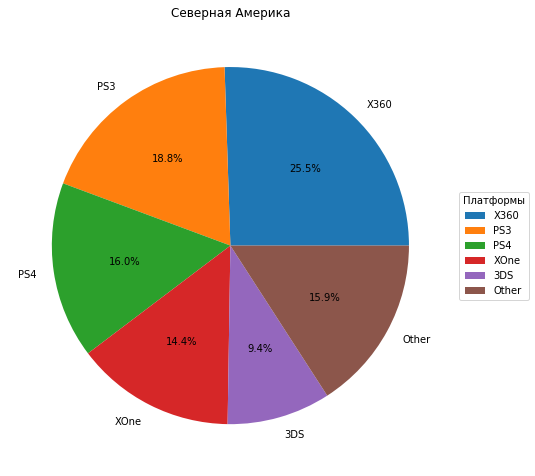

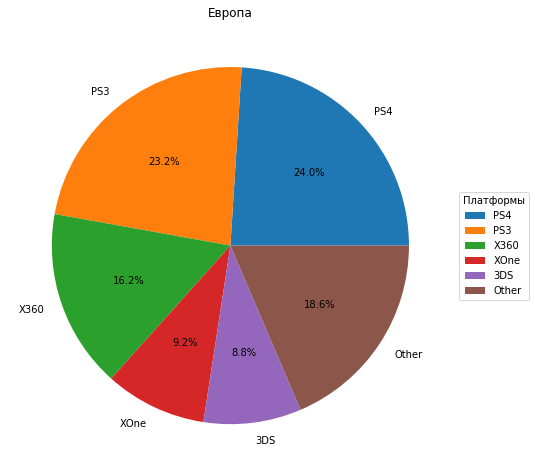

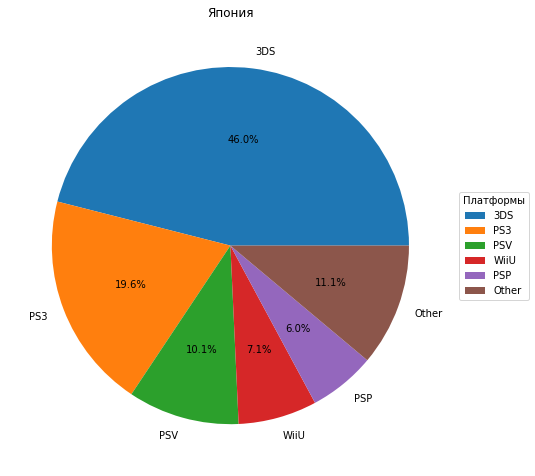

In [43]:
make_pie('platform')

В Северной Америке и Европе 5 самых популярных платформ идентичны, однако если американцы предпочитают X360, то европейцы предпочитают играть на PS4. PS3 держит уверенное 2ое место в обоих регионах, а XOne — 4ое. На 5ом месте располагается платформа 3DS.

В Японии картина кардинально отличается. 3DS занимает 46% рынка и возглавляет чарт. Следом идут PS3, PSV, WiiU и PSP.

#### Определим самые популярные жанры для пользователя каждого региона (NA, EU, JP).

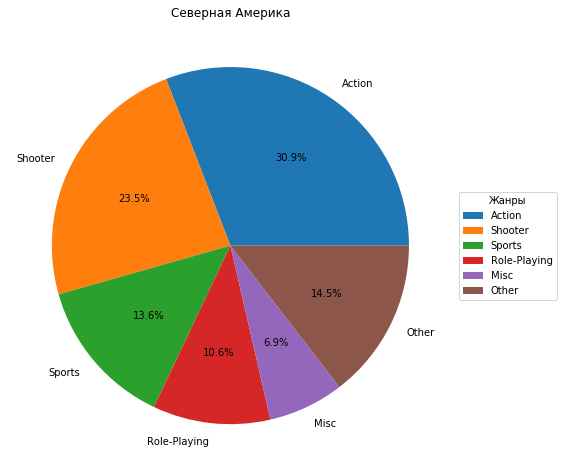

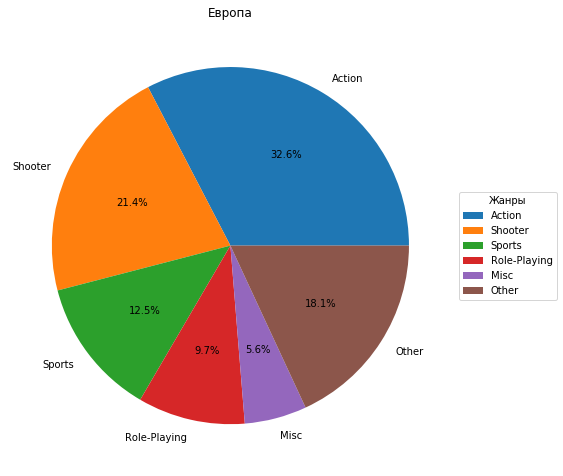

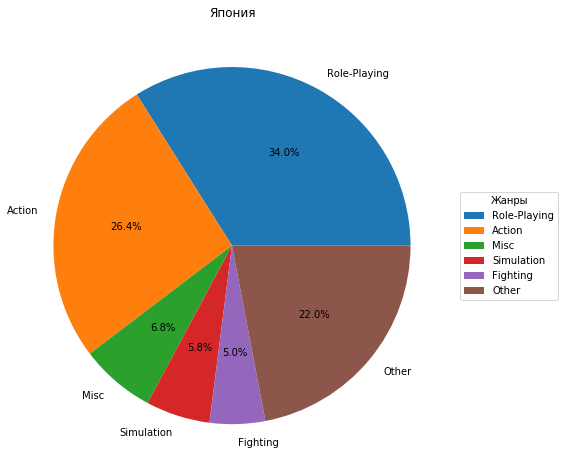

In [44]:
make_pie('genre')

Предпочтительные жанры в Северной Америке и Европе совпадают полностью: Action, Shooter, Sports, Role-Playing и Misc.

Народ Японии предпочитает Role-Playing. Далее идут Action и Misc. Также в стране восходящего солнца, в отличие от западных регионов, популярны жанры Simulation и Fighting.

#### Определим влияние рейтинга ESRB на продажи в отдельном регионе.

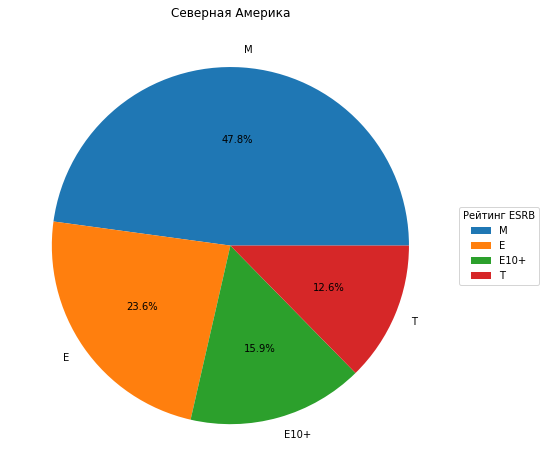

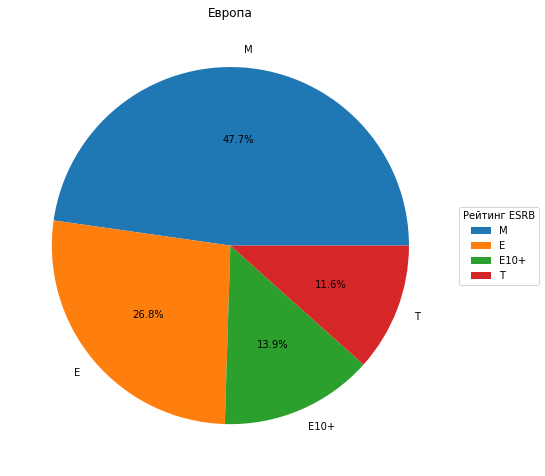

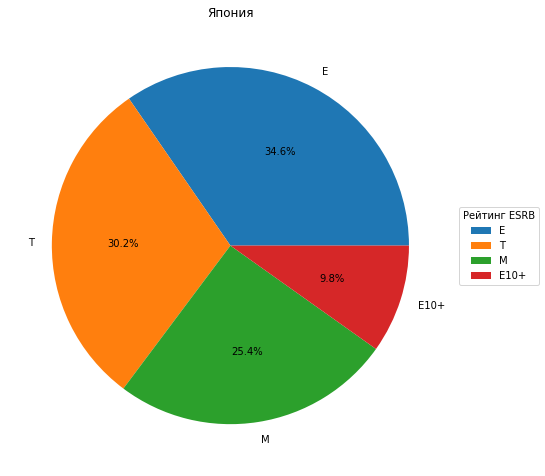

In [45]:
make_pie('rating')

В Северной Америке и Европе популярны игры с рейтингом M (17+). Далее идут игры с рейтингом E (0+), E10+ и Т (13+). Чарты в этих двух регионах практически идентичны.

В Японии игры с рейтингом E — самые популярные, причём за ними идут игры с рейтигом Т и лишь затем игры с рейтингом М.

### Вывод

**Платформы**: В Северной Америке и Европе 5 самых популярных платформ идентичны, однако если американцы предпочитают X360, то европейцы предпочитают играть на PS4. PS3 держит уверенное 2ое место в обоих регионах, а XOne — 4ое. На 5ом месте располагается платформа 3DS. В Японии картина кардинально отличается. 3DS занимает 46% рынка и возглавляет чарт. Следом идут PS3, PSV, WiiU и PSP.

**Жанры**: Предпочтительные жанры в Северной Америке и Европе совпадают полностью: Action, Shooter, Sports, Role-Playing и Misc. Народ Японии предпочитает Role-Playing. Далее идут Action и Misc. Также в стране восходящего солнца, в отличие от западных регионов, популярны жанры Simulation и Fighting.

**Рейтинг ESRB**: В Северной Америке и Европе популярны игры с рейтингом M (17+). Далее идут игры с рейтингом E (0+), E10+ и Т (13+). Чарты в этих двух регионах практически идентичны. В Японии игры с рейтингом E — самые популярные, причём за ними идут игры с рейтигом Т и лишь затем игры с рейтингом М.

## <a id='hypothesis_testing'>Шаг 5. Проверка гипотез</a>

In [46]:
def define_bins(df, column): 
    if df[column].max() > 100:
        return 50
    elif df[column].max() > 500:
        return 100
    elif df[column].max() > 1000:
        return 200
    else:
        return 20

In [47]:
def draw_hist(df1, df2, column, label1, label2):
    '''
    Рисует гистограммы соответствующего столбца датафреймов.
    
    Аргументы:
        df1 (pandas.core.frame.DataFrame): первый датафрейм.
        
        df2 (pandas.core.frame.DataFrame): второй датафрейм.
        
        column (str): название столбца.
        
        label1 (str): метка первой выборки.
        
        label2 (str): метка второй выборки.
    '''
    
    # Создаём фигуру
    plt.figure(figsize=(15, 5))
    # Строим первую гистограмму
    plt.hist(df1[column],                    # по столбцу column датафрейма df1
             bins=define_bins(df1, column),  # с определённым числом корзин по df1[column]
             alpha=0.5,                      # с прозрачностью 0.5
             ec='black',                     # с чёрным цветом обводки
             color='green',                  # с зелёным цветом графика
             label=label1)                   # с меткой label1
    # Строим вторую гистограмму
    plt.hist(df2[column],                    # по столбцу column датафрейма df2
             bins=define_bins(df1, column),  # с определённым числом корзин по df1[column]
             alpha=0.5,                      # с прозрачностью 0.5
             ec='black',                     # с чёрным цветом обводки
             color='red',                    # с красным цветом графика
             label=label2)                   # с меткой label2
    # Отображаем легенду
    plt.legend()
    # Рисуем сетку
    plt.grid()

In [48]:
def draw_kde(df1, df2, column, label1, label2):
    plt.figure(figsize=(15, 5))
    df1[column].plot(kind='kde', color='g', label=label1)
    df2[column].plot(kind='kde', color='r', label=label2)
    plt.ylabel('Плотность')
    plt.legend()

In [49]:
def hypothesis_testing(df1, df2, column, equal_var=False, alpha=.05):
    results = st.ttest_ind(
        df1[column].dropna(),
        df2[column].dropna(),
        equal_var = equal_var)

    print('p-значение:', results.pvalue.round(5))

    if results.pvalue < alpha:
        print('Отвергаем нулевую гипотезу.')
    else:
        print('Не получилось отвергнуть нулевую гипотезу.')

**Нулевая гипотеза $H_0$**:
Средние пользовательские рейтинги платформ Xbox One и PC одинаковы.

**Альтернативная гипотеза $H_1$**:
Средние пользовательские рейтинги платформ Xbox One и PC различны.

In [50]:
xbox_data = actual_data.query('platform == "XOne"')
pc_data = actual_data.query('platform == "PC"')

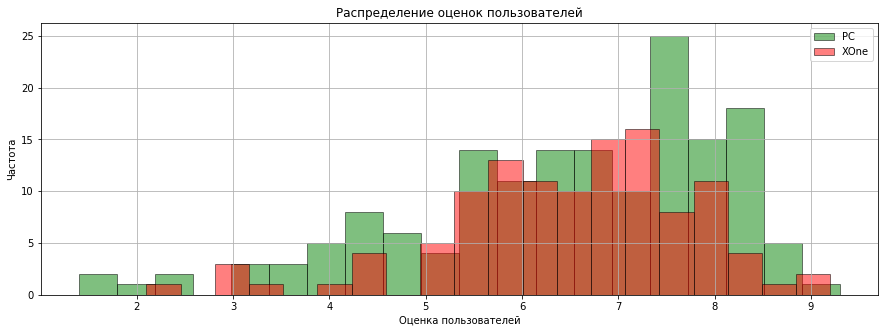

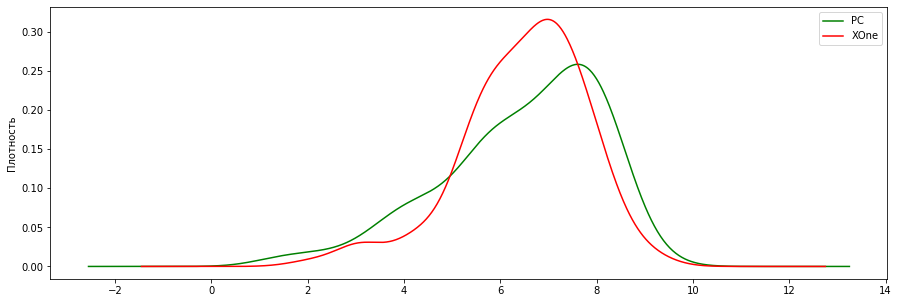

In [51]:
draw_hist(pc_data, xbox_data, 'user_score', 'PC', 'XOne')
plt.title('Распределение оценок пользователей')
plt.xlabel('Оценка пользователей')
plt.ylabel('Частота')
draw_kde(pc_data, xbox_data, 'user_score', 'PC', 'XOne')
plt.show()

In [52]:
np.var(xbox_data['user_score'], ddof=1).round(2)

1.66

In [53]:
np.var(pc_data['user_score'], ddof=1).round(2)

2.71

In [54]:
hypothesis_testing(xbox_data, pc_data, 'user_score')

p-значение: 0.94418
Не получилось отвергнуть нулевую гипотезу.


***

**Нулевая гипотеза $H_0$**:
Средние пользовательские рейтинги жанров Action и Sports одинаковы.

**Альтернативная гипотеза $H_1$**:
Средние пользовательские рейтинги жанров Action и Sports различны.

In [55]:
action_data = actual_data.query('genre == "Action"')
sports_data = actual_data.query('genre == "Sports"')

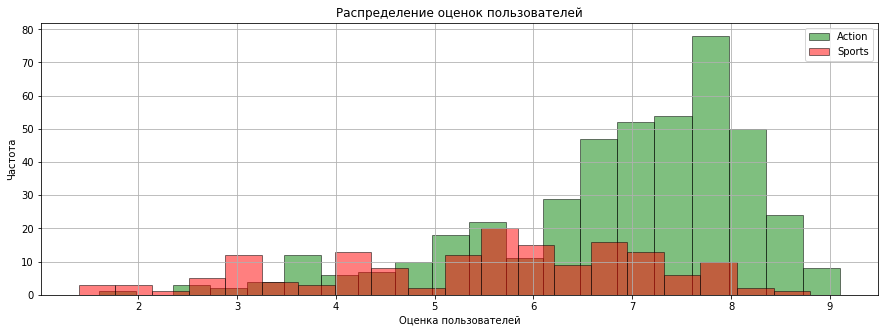

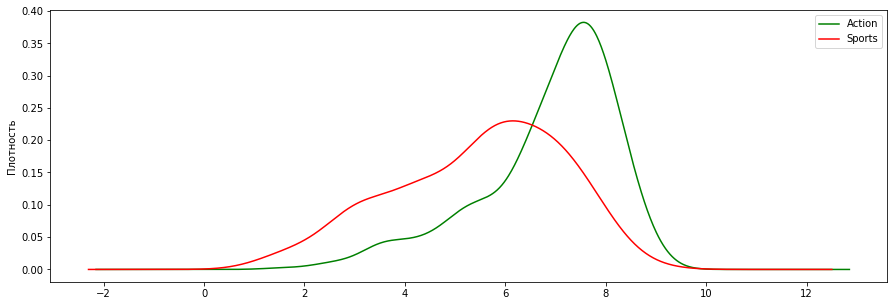

In [56]:
draw_hist(action_data, sports_data, 'user_score', 'Action', 'Sports')
plt.title('Распределение оценок пользователей')
plt.xlabel('Оценка пользователей')
plt.ylabel('Частота')
draw_kde(action_data, sports_data, 'user_score', 'Action', 'Sports')
plt.show()

In [57]:
np.var(action_data['user_score'], ddof=1).round(2)

1.83

In [58]:
np.var(sports_data['user_score'], ddof=1).round(2)

2.78

In [59]:
hypothesis_testing(action_data, sports_data, 'user_score')

p-значение: 0.0
Отвергаем нулевую гипотезу.


### Вывод

Сформулировано две гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковы.
2. Средние пользовательские рейтинги жанров Action и Sports одинаковы.

Распределения оценок пользователей рассматриваемых платформ и рассматриваемых игровых жанров нормальные, скошенные влево.

Проверка гипотез выполнялась в помощью t-теста Стьюдента для среднего двух независимых выборок. При проверке гипотез был выбран стандартный уровень значимости в 5%.

Отвергнуть первую гипотезу не удалось с p-значением в 0.94. Вторая гипотеза была отвергнута со стремящимся к нулю p-значением. 

## <a id='general_conclusion'>Шаг 6. Общий вывод</a>

На вход получен датафрейм, состоящий из 16 715 строк и 11 столбцов. В двух строках имеются пропуски в названии игры и её жанра. Год выпуска пропущен в 1.61% данных. Также пропущено свыше 40% оценок пользователей и данных о рейтинге от организации ESRB. Оценка критиков отсутствует в свыше 50% данных. Возможно, открытые источники, из которых получены данные, не сильно интересуются отзывами об играх.

Дубликатов в датафрейме не обнаружено.

Также в глаза бросаются следующие артефакты:

- Названия столбцов приведены в неудобном для работы регистре;
- В некоторых столбцах обнаружено несоответствие типов данных (год выпуска и оценка критиков представлены числами с плавающей точкой, оценка пользователей — в формате *object*).
- Согласно данным <a href=https://www.esrb.org/ratings-guide/><b>ESRB Ratings Guide</b></a> и статье в Википедии <a href=https://en.wikipedia.org/wiki/Entertainment_Software_Rating_Board><b>Entertainment Software Rating Board</b></a>, рейтинг *K-A* был переименован в *E* в 1998 году. Рейтинг *EC* перестал использоваться с 2018 года, поэтому его появление в данных за 2016 год не вызывает вопросов.

Названия столбцов были приведены к нижнему регистру. Год выпуска игры и оценка критиков, измеряемая по стобалльной шкале, были приведены к целочисленному типу.

В столбце с оценкой пользователей обнаружено значение *tbd*, означающее *to be determined*, то есть значение будет определено в будущем. Следовательно, в строках с соответствующим значением оценки пользователей пока неизвестны. Поэтому эти данные были приведены к типу *float64*, а значения *tbd* заменены на пропуски.

Рейтинг *K-A* в данных датафрейма был заменён на рейтинг *E*.

Существенное количество пропусков обнаружено лишь в данных об оценках пользователей, оценках критиков и рейтинге.

Идея заменить пропуски средним значением по всем платформам, если игра представлена на нескольких платформах и информация о пропущенных данных известна на соседних, была отвергнута, так как в итоге удалось заполнить менее 5% пропусков за непростительно долгое время работы функции.

Малочисленные пропуски в именах игр, их жанров и годов выпуска были удалены.

Суммарные продажи во всех регионах были посчитаны и записаны в отдельный столбец.

Наблюдается резкий подъём игровой индустрии, начиная с 90-х годов. Пик выпуска игр приходится на 2006-2011 годы, когда было выпущено более тысячи игр. Начиная с 2012 года наблюдается спад объёма выпуска. Планируя кампанию на 2017 год, опираться на данные многолетней давности не стоит.

Даже самые прибыльные платформы за 10-12 лет изживают себя, причём около 5-6 лет они идут к пику своей популярности и ещё 5-6 лет их популярность стремится к изначальной. Следовательно, **актуальным периодом** назовём последние 4 года, а именно период с 2012 до 2015 годы, не включая сам 2016 год ввиду неполноты данных по нему.

Наблюдается рост исключительно в сфере консольных игр (платформы PS4 и XOne). В свою очередь игры для этих платформ начали выпускать лишь в 2013 году, поэтому, скорее всего, ближайшие годы платформы останутся популярными.

Продажи PS3, PS4 и X360 на порядок выше остальных — медианный показатель продаж свыше 60 млн копий и достигает 100 млн копий.

На всех рассмотренных платформах отсутствует сильная зависимость между продажами и оценками. В некоторых срезах настолько мало данных, что корреляция оказывается обманчивым показателем. Делать выводы из этих зависимостей не стоит, ибо более половины оценок в исходных данных были пропущены.

Самыми прибыльными жанрами являются Action, Shooter и Role-Playing с продажами, превышающими 411, 266 и 174 млн копий. Игры жанра Puzzle сейчас продаются очень плохо. Чуть лучше дела обстоят у Strategy и Adventure, но и они нынче в упадке.

Самими популярными жанрами являются Action, Role-Playing и Adventure. Игр в этом жанре в выборке 853, 316 и 246 соответственно. Здесь Puzzle и Strategy тоже андердоги — всего 27 и 58 игр соответственно.

Самими прибыльными в среднем являются игры жанров Shooter, Platform и Sports. В среднем одна игра продаётся тиражём в 1.4 млн, 820 тыс и 715 тыс копий соответственно. Игры жанров Adventure, Puzzle и Strategy в среднем продают всего 100-200 тыс копий, в два раза уступая идущим перед ними файтингам.

**Платформы**: В Северной Америке и Европе 5 самых популярных платформ идентичны, однако если американцы предпочитают X360, то европейцы предпочитают играть на PS4. PS3 держит уверенное 2ое место в обоих регионах, а XOne — 4ое. На 5ом месте располагается платформа 3DS. В Японии картина кардинально отличается. 3DS занимает 46% рынка и возглавляет чарт. Следом идут PS3, PSV, WiiU и PSP.

**Жанры**: Предпочтительные жанры в Северной Америке и Европе совпадают полностью: Action, Shooter, Sports, Role-Playing и Misc. Народ Японии предпочитает Role-Playing. Далее идут Action и Misc. Также в стране восходящего солнца, в отличие от западных регионов, популярны жанры Simulation и Fighting.

**Рейтинг ESRB**: В Северной Америке и Европе популярны игры с рейтингом M (17+). Далее идут игры с рейтингом E (0+), E10+ и Т (13+). Чарты в этих двух регионах практически идентичны. В Японии игры с рейтингом E — самые популярные, причём за ними идут игры с рейтигом Т и лишь затем игры с рейтингом М.

Сформулировано две гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковы.
2. Средние пользовательские рейтинги жанров Action и Sports одинаковы.

Распределения оценок пользователей рассматриваемых платформ и рассматриваемых игровых жанров нормальные, скошенные влево.

Проверка гипотез выполнялась в помощью t-теста Стьюдента для среднего двух независимых выборок. При проверке гипотез был выбран стандартный уровень значимости в 5%.

Отвергнуть первую гипотезу не удалось с p-значением в 0.94. Вторая гипотеза была отвергнута со стремящимся к нулю p-значением. 